# E-Commerce Customer Segmentation Project

## Introduction

#### Welcome to my E-commerce Customer Segmentation Project! In this analysis, I aim to uncover valuable insights from transactional data of an online retail company based in the UK. By employing advanced data science techniques, I seek to segment customers into distinct groups based on their behavior, enabling the company to tailor marketing strategies and enhance customer satisfaction.

#### Through this project, we will explore various aspects of the dataset, including purchase history, browsing behavior, and demographic details. My goal is to develop a deeper understanding of customer behavior and preferences, ultimately leading to more targeted and effective business strategies.

#### The project will follow a structured approach, encompassing data cleaning, feature engineering, exploratory data analysis, and the application of clustering algorithms. We will evaluate the quality of our segmentation and provide meaningful interpretations of the resulting customer clusters.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline

## Load Data from CSV file retrived from UCI Machine Learning Repository

In [3]:
data = pd.read_csv('customer_seg_data.csv')

## Data Exploration and Cleaning

In [4]:
# Data Exploration
print(data.head())
print(data.info())
print(data.describe())

# Step 4: Data Cleaning
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 8:26       2.55     17850.0  United Kingdom  
1  2010-12-01 8:26       3.39     17850.0  United Kingdom  
2  2010-12-01 8:26       2.75     17850.0  United Kingdom  
3  2010-12-01 8:26       3.39     17850.0  United Kingdom  
4  2010-12-01 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoic

## Feature Engineering

In [20]:
# Setting 'today' to be the last date of the dataset for easy manipulation
today = pd.to_datetime(data['InvoiceDate']).max()

# Converting the 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculating the recency of the data using today variable
data['Recency'] = (today - data['InvoiceDate']).dt.days

# Group data by 'CustomerID' and aggregate RFM metrics for later segmentation
rfm = data.groupby('CustomerID').agg({
    'Recency': 'min', #Recenecy
    'InvoiceNo': 'count',  # Frequency
    'UnitPrice': 'sum'     # Monetary Value
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,2.08
12347.0,1,182,481.21
12348.0,74,31,178.71
12349.0,18,73,605.10
12350.0,309,17,65.30
12352.0,35,95,2211.10
12353.0,203,4,24.30
12354.0,231,58,261.22
12355.0,213,13,54.65


## Data Visualization

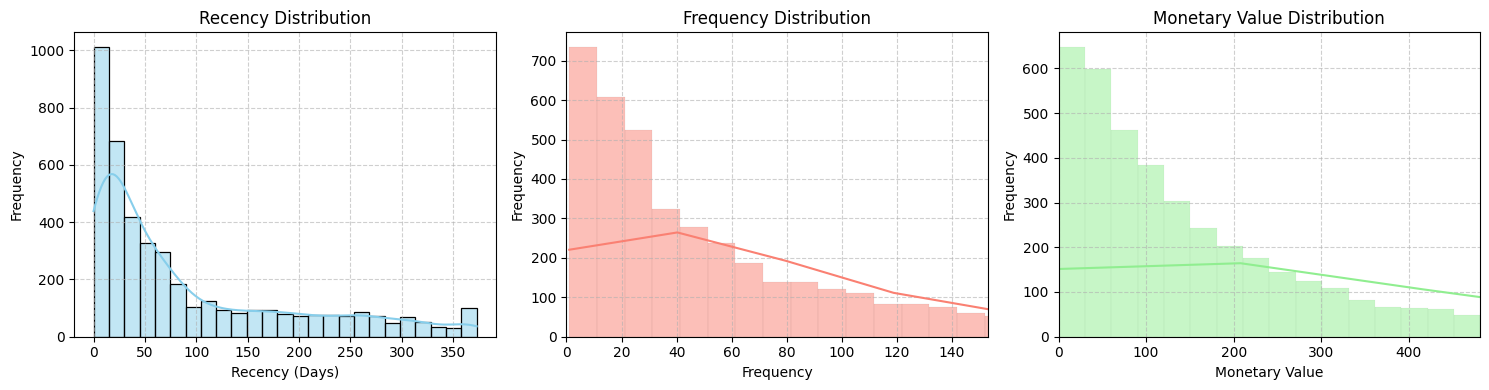

In [32]:
# Create subplots with improved readability
plt.figure(figsize=(15, 4))

# Plot 1: Recency Distribution
plt.subplot(131)
sns.histplot(rfm['Recency'], kde=True, color='skyblue')
plt.title('Recency Distribution')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Frequency Distribution (Top 25%)
plt.subplot(132)
sns.histplot(rfm['Frequency'], kde=True, color='salmon')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.xlim(0, rfm['Frequency'].quantile(0.85))  # Show top 25% only
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 3: Monetary Value Distribution (Top 25%)
plt.subplot(133)
sns.histplot(rfm['Monetary'], kde=True, color='lightgreen')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Frequency')
plt.xlim(0, rfm['Monetary'].quantile(0.85))  # Show top 25% only
plt.grid(True, linestyle='--', alpha=0.6)

# Adjusting the layout of the plots
plt.tight_layout()
plt.show()

## Customer Segmentation

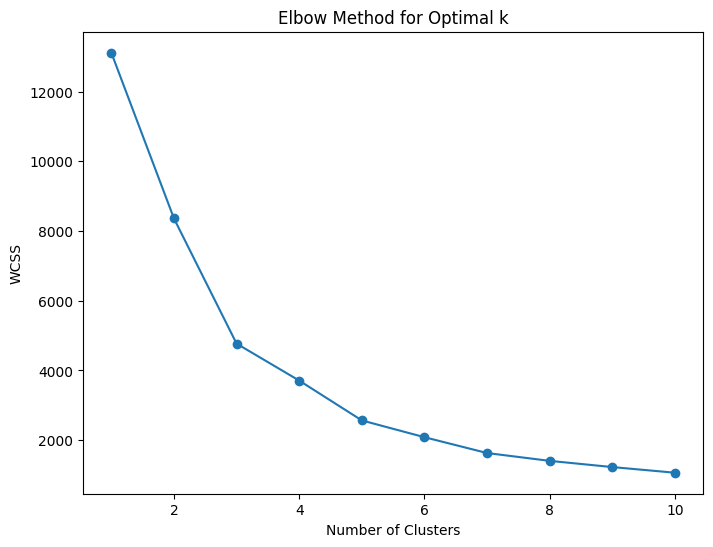

Silhouette Score: 0.6040620435989091


In [30]:
# Combine Recency, Frequency, and Monetary into a feature matrix (as the x-axis of our data)
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph to find optimal k
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal k (number of clusters)
optimal_k = 3  # Adjust based on the Elbow method graph, in this case we choose k = 3 as this is the point just before a drastic change in slope

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 8: Evaluate Segmentation
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, rfm['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

#### The Silhouette Score ranges from -1 to 1. A high score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### Our score around 0.6 is generally seen as a good indication that we have well-defined clusters.

#### Our score of 0.604 indicates that the clusters are relatively well apart from each other and clearly distinguished.

#### This suggests that the chosen value of k (in this case, 3) is reasonable for the given dataset.

## Evaluation of Model

In [15]:
# Step 9: Cluster Analysis and Interpretation
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
})

# Get the number of customers in each cluster
cluster_summary['Num_Customers'] = rfm['Cluster'].value_counts()

# Rename columns for clarity
cluster_summary.columns = ['Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Num_Customers']

# Display the cluster summary
print(cluster_summary)

         Avg_Recency  Avg_Frequency  Avg_Monetary  Num_Customers
Cluster                                                         
0          39.427700     106.267236    333.119845           3278
1          39.142857    3400.142857  28077.950000              7
2         247.046918      27.101196     98.146597           1087


## Interprating the Customer Segments

In [16]:
for cluster_num in range(optimal_k):
    print(f'\nCluster {cluster_num}:')
    print('-'*15)
    print(f'Average Recency: {cluster_summary.loc[cluster_num, "Avg_Recency"]:.2f} days')
    print(f'Average Frequency: {cluster_summary.loc[cluster_num, "Avg_Frequency"]:.2f} purchases')
    print(f'Average Monetary Value: ${cluster_summary.loc[cluster_num, "Avg_Monetary"]:.2f}')
    print(f'Number of Customers: {cluster_summary.loc[cluster_num, "Num_Customers"]}')


Cluster 0:
---------------
Average Recency: 39.43 days
Average Frequency: 106.27 purchases
Average Monetary Value: $333.12
Number of Customers: 3278

Cluster 1:
---------------
Average Recency: 39.14 days
Average Frequency: 3400.14 purchases
Average Monetary Value: $28077.95
Number of Customers: 7

Cluster 2:
---------------
Average Recency: 247.05 days
Average Frequency: 27.10 purchases
Average Monetary Value: $98.15
Number of Customers: 1087


#### Based on the above interpretation, we see a segmentated customer base, the marketing team may be advised to target cluster 1: what I cal lthe VIP/High-value customers. These customers all have made recent purchases while having a high frequency of purchases with a large monetary value (although this subset of customers only accounts for 7 customers for teh company)

## For Target Marketing Interpretation

In [24]:
def assign_cluster(customer_id):
    # Retrieve the Recency, Frequency, and Monetary values for the customer
    customer_data = rfm.loc[customer_id][['Recency', 'Frequency', 'Monetary']]
    customer_data_scaled = scaler.transform(customer_data.values.reshape(1, -1))
    
    # Predict the cluster using the K-means model
    cluster = kmeans.predict(customer_data_scaled)[0]
    return cluster

# Example usage:
customer_id = 15862  # Replace with the desired CustomerID
assigned_cluster = assign_cluster(customer_id)
print(f"The customer with ID {customer_id} belongs to Cluster {assigned_cluster}")

The customer with ID 15862 belongs to Cluster 0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Outputting rfm dataset as CSV

In [33]:
rfm.to_csv('rfm_data.csv', index = False)